In [10]:
#Importing Libraries and Modules that will be used
from scipy import linalg as la
from scipy import optimize
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
## The Rosenbrock Function used
x1, x2,f = sympy.symbols("x_1,x_2,f")
100*(x1 - x2**2)**2 + (1-x1)**2

In [13]:
#For Calculating Partial Derivatives using Finite Difference Method

def fp(f,x,h):
    """
    Gradient of the Objective Function using the 
    Finite Difference Three-Point Formula for the First Derivative
    
    Parameters:
    f - The Objective function must by a function of two variables, (e.g. f(a,b))
    x - must contain two values (e.g. x = np.array([a,b]))
    h - step size

    """
    x1 = x[0].item()
    x2 = x[1].item()
    a1 = np.array([x1+h,x2]); b1 = np.array([x1-h,x2])
    a2 = np.array([x1,x2+h]); b2 = np.array([x1,x2-h])
    g11 = (fun(a1)-fun(b1))/(2*h)
    g12 = (fun(a2)-fun(b2))/(2*h)
    return np.array([g11,g12])

def fh(f,x,h):
    """
    Hessian of the Objective Function using 
    Finite Difference Three-point Formula for the Second Derivative

    Parameters:
    f - The Objective function must by a function of two variables, (e.g. f(a,b))
    x - must contain two values (e.g. x = np.array([a,b]))
    h - step size
    
    """
    x1 = x[0].item()
    x2 = x[1].item()
    a1 = np.array([x1-h,x2]); a2 = np.array([x1,x2]); a3 = np.array([x1+h,x2])
    b1 = np.array([x1,x2-h]); b2 = np.array([x1,x2]); b3 = np.array([x1,x2+h])
    c1 = np.array([x1-h,x2-h]); c2 = np.array([x1,x2]); c3 = np.array([x1+h,x2+h])
    h11 = (fun(a1)-2*fun(a2)+fun(a3))/(h**2)
    h22 = (fun(b1)-2*fun(b2)+fun(b3))/(h**2)
    h12 = h21 = (fun(c1)-2*fun(c2)+fun(c3))/(2*(h**2)) - (1/2)*h11 - (1/2)*h22 
    return np.array([[h11,h12],[h21,h22]])


Optimal solution: [0.9991784  0.99834841]
Number of Iterations: 2000
Function Value is: 6.832537484927677e-07


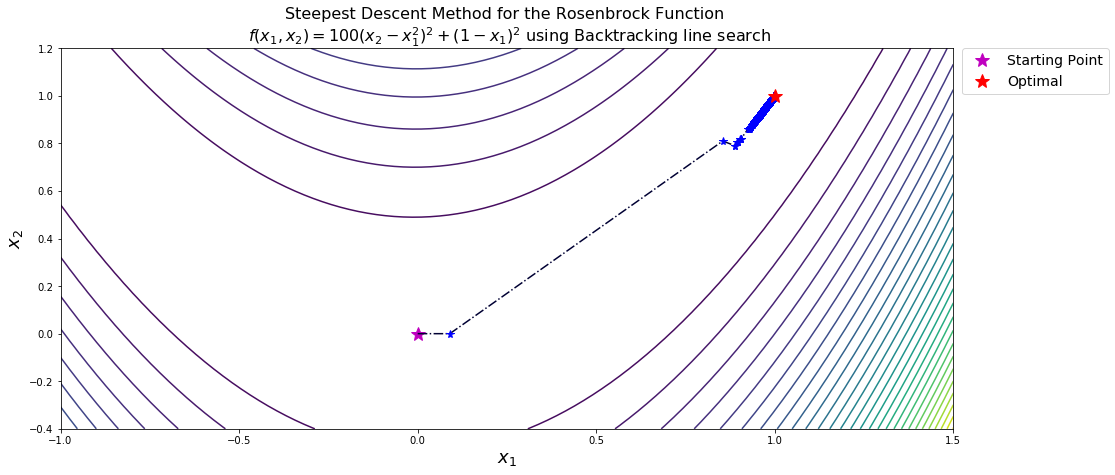

In [6]:
# Steepest Descent Method using Backtracking Line Search with Armijo's Condition
#Create the Objective Function (Rosenbrock Function)
def fun(x):
    x1 = x[0].item()
    x2 = x[1].item()
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

#initialize starting point (0,0) and step size h 
x1 = 0; x2 = 0; h = 1e-4; x0 = np.array([x1, x2]) 

#Chosen Conditions for Backtracking Line Search Algorithm
a = 0.5; p = 0.3; c1 = 1e-5

#Steepest Descent Algorithm
iter = 0
xdict = []
while la.norm(fp(fun,x0,h)) > 1e-5 and iter < 2e+3:
    xdict.append(x0.copy())
    g = -fp(fun,x0,h)
    a = 0.5 #Reset 'a' using Backtracking Line Search
    #Backtracking Line Search with Armijo's Condition
    iter1 = 0
    while fun(x0 + a * g) > fun(x0) + c1 * a * np.dot(fp(fun,x0,h).T, g):
        a = p * a
        iter1 += 1
    x = x0 + a * g.T
    x0 = x
    iter = iter + 1

xdict = np.array(xdict)
xdict1 = xdict[:,0]
xdict2 = xdict[:,1]

print("Optimal solution:", x0)
print("Number of Iterations:", iter)
print("Function Value is:", fun(x0))


#Redefining the objective Function for plotting
def fplot(x1, x2):
    return 100*(x2-x1**2)**2 + (1-x1)**2

#Plotting
fig, axes = plt.subplots(figsize=(16,7))
x_ = np.linspace(-1,1.5,100); y_ = np.linspace(-0.4,1.2,100)
X,Y = np.meshgrid(x_,y_)
contplot = axes.contour(X,Y,fplot(X,Y),30)
axes.plot(xdict[0, 0], xdict[0, 1], "m*",markersize=15,label="Starting Point")
axes.plot(xdict1,xdict2,color="#000033",ls="-.",lw=1.5)
for i in range(1,np.size(xdict1)):
    axes.plot(xdict1[i],xdict2[i],"b*",markersize=8)
axes.plot(x0[0],x0[1],"r*", markersize=15,label="Optimal")
axes.set_xlabel(r"$x_1$",fontsize=18)
axes.set_ylabel(r"$x_2$",fontsize=18)
axes.set_title("Steepest Descent Method for the Rosenbrock Function \n $f(x_1,x_2) = 100(x_2 - x_1^2)^2 + (1-x_1)^2$ using Backtracking line search",fontsize=16)
axes.legend(bbox_to_anchor=(1.01,1), loc=2, borderaxespad=0.0,ncol=1,fontsize=14)
plt.show()

Minimum of the Objective function at found at : [0.99133765 0.98274235]
Number of Iterations: 2000
Current Function Value 7.504263356264937e-05


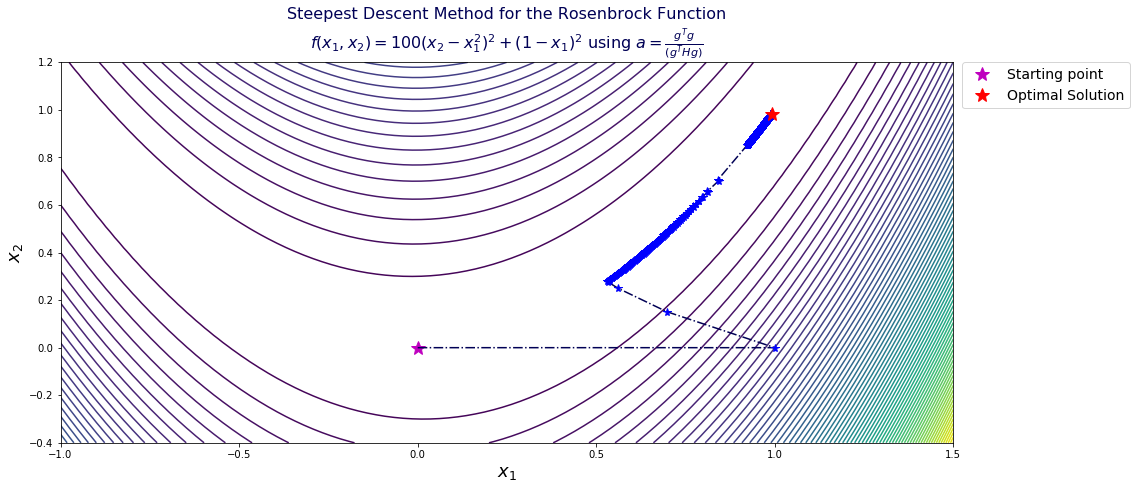

In [14]:
#Steepest Descent Method using a = (g.T *g) / (g.T*H*g)
#Create the Objective Function (Rosenbrock Function)
def fun(x):
    x1 = x[0].item()
    x2 = x[1].item()
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

#Initialize
x1 = 0; x2 = 0; h = 1e-5; x0 = np.array([x1, x2])

#Steepest Descent Method Similar Algorithm to MATLAB
iter = 0
xdict = []
while la.norm(fp(fun,x0,h)) > 1e-5 and iter < 2e+3:
    xdict.append(x0)
    g = -fp(fun,x0,h)
    H = fh(fun,x0,h)
    a = np.dot(g.T, g) / np.dot(np.dot(g.T, H),g)
    x = x0 + a * g
    x0 = x
    iter = iter + 1
xdict = np.array(xdict)
xdict1 = xdict[:, 0]; xdict2 = xdict[:, 1]

print("Minimum of the Objective function at found at :", x0)
print("Number of Iterations:", iter)
print("Current Function Value", fun(x0))


#Redefining the objective Function for plotting
def fplot(x1, x2):
    return 100*(x2-x1**2)**2 + (1-x1)**2

fig, axes = plt.subplots(figsize=(16,7))
x_ = np.linspace(-1,1.5,100); y_ = np.linspace(-0.4,1.2,100)
X,Y = np.meshgrid(x_,y_)
contplot = axes.contour(X,Y,fplot(X,Y),70)
axes.plot(xdict[0,0],xdict[0,1],"m*",markersize=15,label="Starting point")
axes.plot(xdict1,xdict2,color="#000055",ls="-.",lw=1.5)
for i in range(1,np.size(xdict1)):
    axes.plot(xdict1[i],xdict2[i],"b*",markersize=8)
axes.plot(x0[0],x0[1],"r*", markersize=15,label="Optimal Solution")
axes.set_xlabel(r"$x_1$",fontsize=18)
axes.set_ylabel(r"$x_2$",fontsize=18)
axes.set_title("Steepest Descent Method for the Rosenbrock Function\n" + r"$f(x_1,x_2) = 100(x_2 - x_1^2)^2 + (1-x_1)^2$ using $a = \frac{g^T g}{(g^T H g)}$",fontsize=16,color="#000055")
axes.legend(bbox_to_anchor=(1.01,1), loc=2, borderaxespad=0.0,ncol=1,fontsize=14)
plt.show()